In [7]:
from orchestrator import MLOrchestrator
import pandas as pd

In [8]:
df_path = pd.read_csv('./data/medical_insurance_cost.csv')
orch = MLOrchestrator()
orch.load_data(df=df_path, target='charges')

✅ Data successfully loaded!
Looks like children is a factorized categorical. Reclassifying...
ℹ️  Column Classification: 3 Numerical | 4 Categorical
🛠️ Tools initialized: DataExplorer & Visualizer ready.



--- 🔍 Starting Analysis (Mode: all) ---

--------------- DATA SUMMARY ---------------
📐 Dimensions:  1338 Rows x 7 Columns
📊 Data Types:  4 Categorical, 3 Numerical
✅ Nulls:       None detected.
⚠️ Duplicates:  1 rows (Recommendation: Drop them).
--------------------------------------------

--------------- UNIVARIATE ANALYSIS ---------------
🔢 Numerical Statistics:
           count      mean       std      min      25%      50%       75%       max
-------  -------  --------  --------  -------  -------  -------  --------  --------
age      1338.00     39.21     14.05    18.00    27.00    39.00     51.00     64.00
bmi      1338.00     30.66      6.10    15.96    26.30    30.40     34.69     53.13
charges  1338.00  13270.42  12110.01  1121.87  4740.29  9382.03  16639.91  63770.43
--------------------------------------------
🔠 Categorical Frequencies:
sex     children  smoker  region   
female  0         no      northeast    0.048580
male    0         no      southeast    0.044843
female

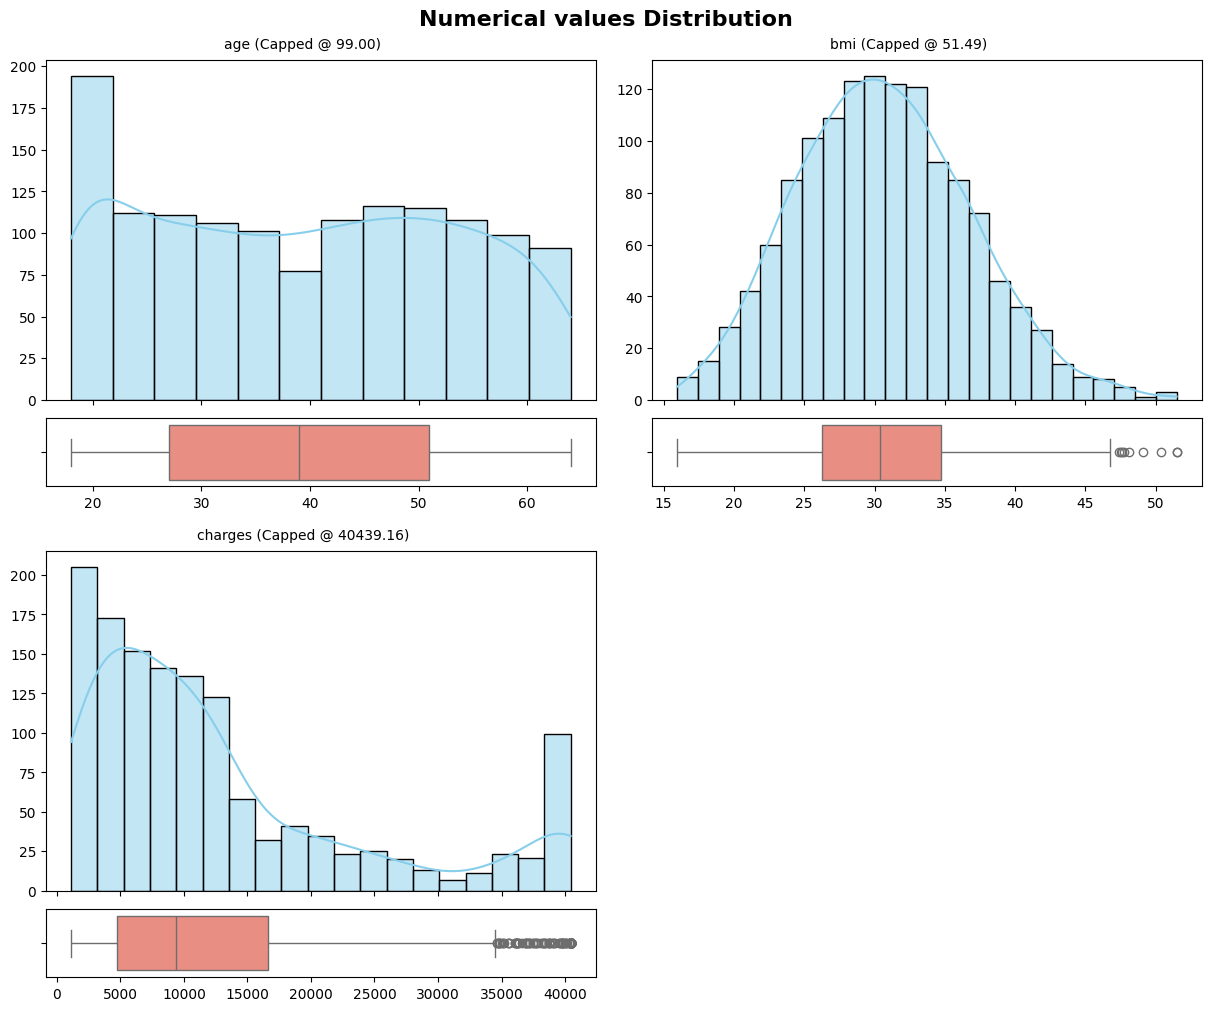

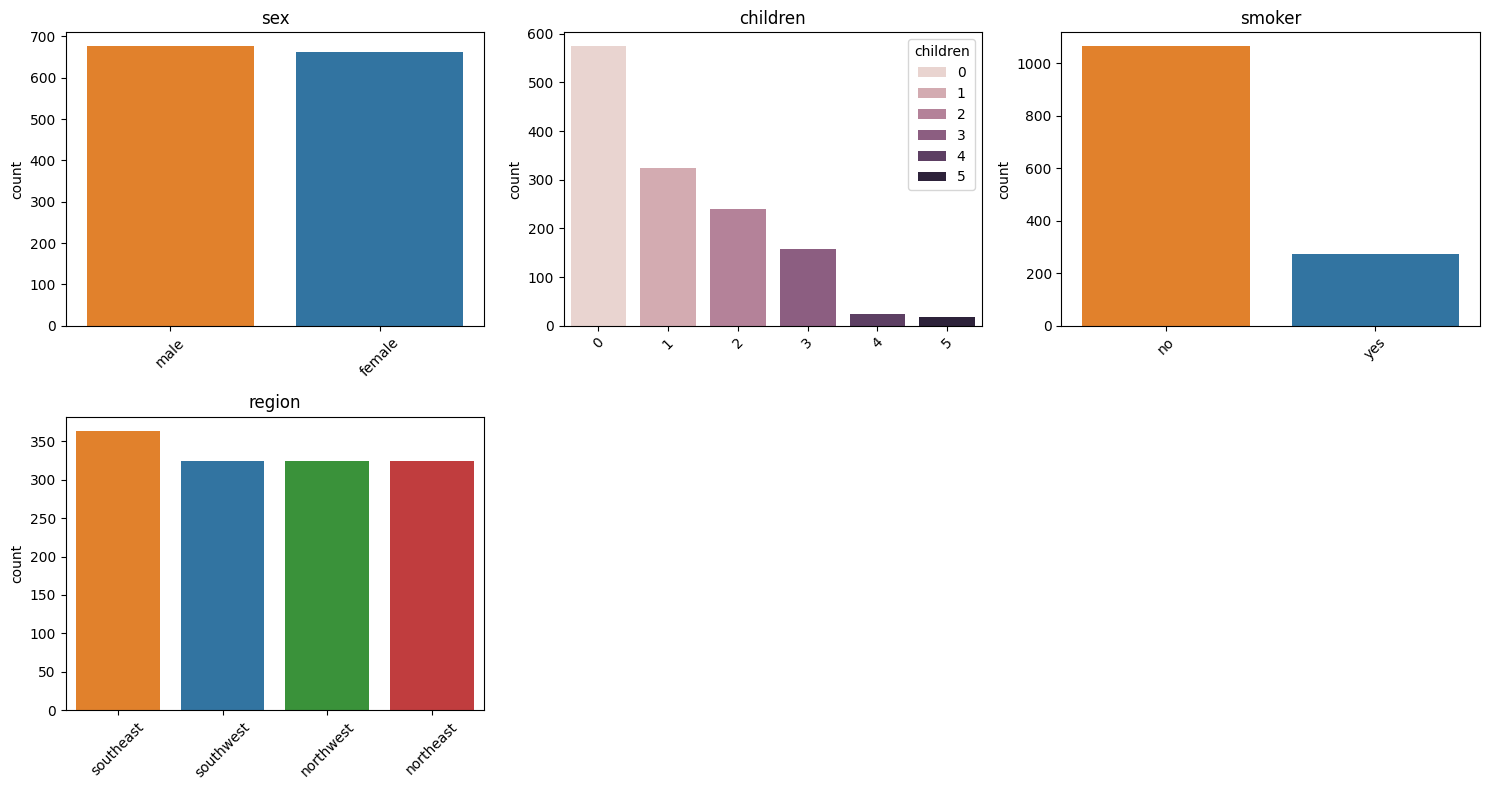

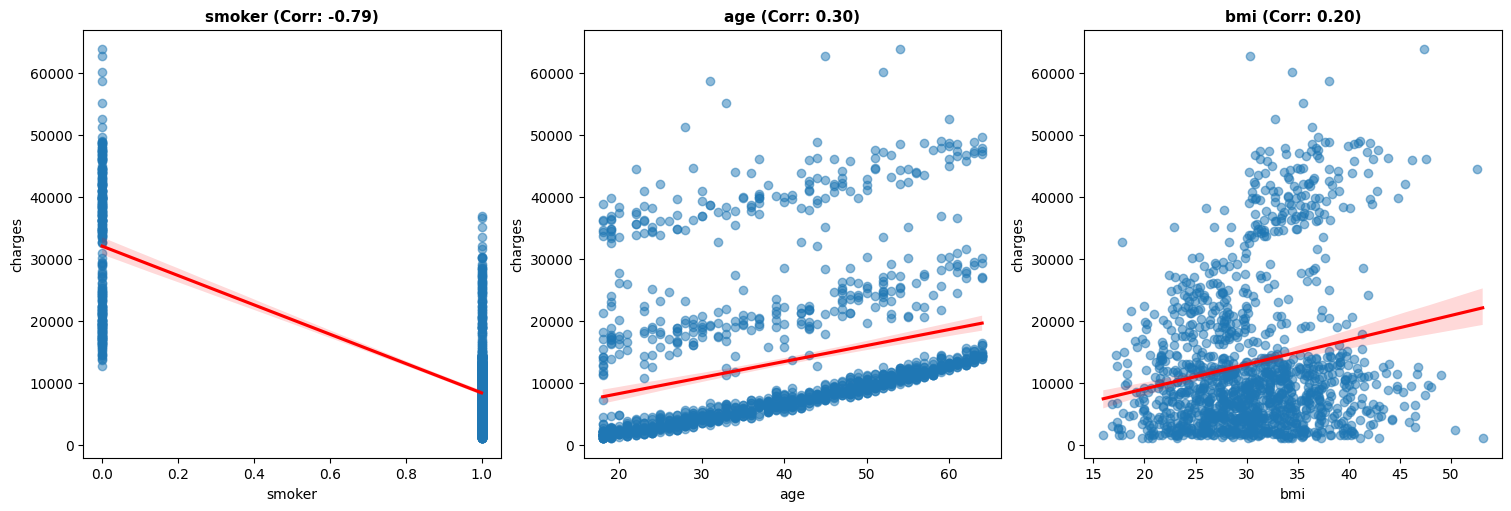

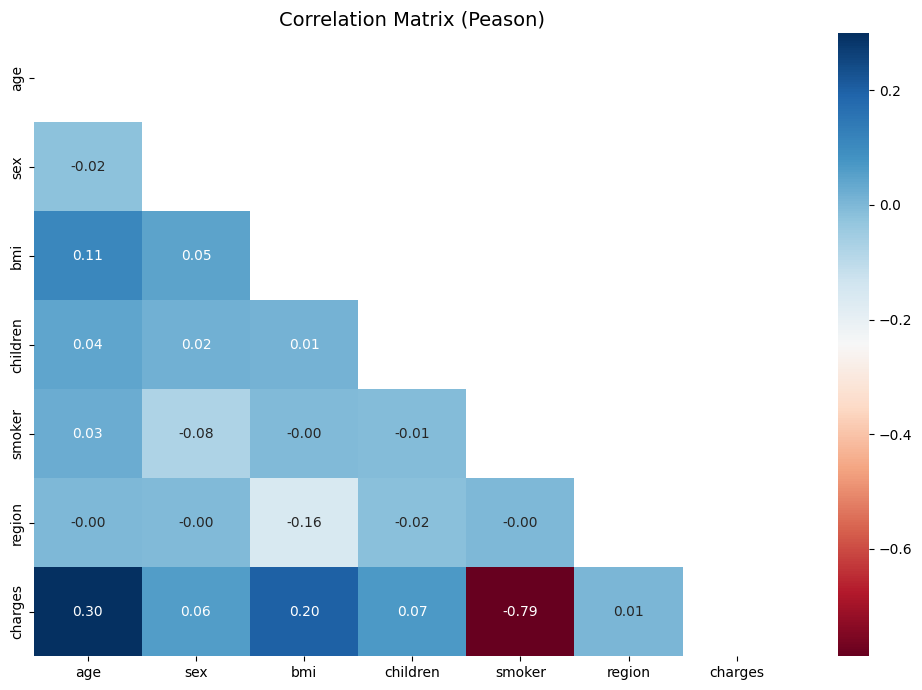

In [9]:
orch.execute_analysis(mode='all')

In [10]:
orch.prepare_features(save_path='./medical')

=============== SETTING FEATURE ENGINEERING ===============
---------------------------- Null handling -----------------------------
✅ Nulls:       No missing values detected.
🔢 Encoding:    Factorized 4 categorical columns.
💾 Encoders:    Saved 4 JSON files in './medical/encoders'
✂️  Outliers:    Processed 2 numerical columns (IQR Method).

⚙️  Processing Variants...
-------------- Initiating automatic preparation for: with_outliers --------------
Scaler (MinMax) saved in: ./medical/scalers/scaler_minmax.pkl
 -> MinMaxScaler applied... 
Scaler (Standard) saved in: ./medical/scalers/scaler_standard.pkl
 -> StandardScaler applied... 
 -> Feature selection ON, applying... 
 -> Selected features (5): ['sex', 'bmi', 'children', 'smoker', 'region']
💾 Datasets:    Saved 12 files for 'with_outliers' in './medical/datasets'
-------------- Initiating automatic preparation for: without_ouliers --------------
Scaler (MinMax) saved in: ./medical/scalers/scaler_minmax.pkl
 -> MinMaxScaler applied.

/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [11]:
config = './config/param_config.json'
orch.initialize_trainer(problem_type='regression', config_path=config)


🥊 --- Initializing ModelTrainer (regression) ---
   -> Loading default configuration for regression...
Added models for: regression
['RandomForestRegressor', 'DecisionTreeRegressor', 'Lasso', 'Ridge', 'SVR']


In [12]:
orch.run_training_cycle()


--------------- MODEL TRAINING & EVALUATION ---------------
🏋️  Training 5 models across 10 datasets...
🏆 Winner: 'RandomForestRegressor' on 'X_train_with_outliers_standard' (Test Score: 0.8659)

📊 Preliminary Results:


,dataset,model,type,Coef,RMSE,train_score,test_score,R2_score,gap
10,X_train_with_outliers_standard,RandomForestRegressor,regression,"[0.13390710656951538, 0.006872085530741197, 0....",4563.33,0.974920,0.865867,0.865867,0.109053
35,X_train_without_ouliers_standard,RandomForestRegressor,regression,"[0.13389500862285544, 0.006872085530741197, 0....",4568.99,0.974886,0.865534,0.865534,0.109352
0,X_train_with_outliers,RandomForestRegressor,regression,"[0.13390710656951538, 0.006872085530741197, 0....",4583.58,0.974828,0.864674,0.864674,0.110155
25,X_train_without_ouliers,RandomForestRegressor,regression,"[0.13389500862285544, 0.006872085530741197, 0....",4583.63,0.974845,0.864671,0.864671,0.110175
5,X_train_with_outliers_minmax,RandomForestRegressor,regression,"[0.13390710656951538, 0.006872085530741197, 0....",4588.34,0.974890,0.864393,0.864393,0.110497
30,X_train_without_ouliers_minmax,RandomForestRegressor,regression,"[0.13389500862285544, 0.006872085530741197, 0....",4593.62,0.974907,0.864080,0.864080,0.110827
12,X_train_with_outliers_standard,Lasso,regression,"[3619.2397854014607, -14.336451243309616, 2024...",5798.86,0.742850,0.783401,0.783401,0.040551
2,X_train_with_outliers,Lasso,regression,"[257.33328487215084, -26.49146198332766, 335.2...",5798.99,0.742850,0.783391,0.783391,0.040542
7,X_train_with_outliers_minmax,Lasso,regression,"[11829.483482028609, -26.102483873922413, 1242...",5799.09,0.742849,0.783384,0.783384,0.040534
13,X_train_with_outliers_standard,Ridge,regression,"[3616.4513001799824, -14.794609968572058, 2023...",5799.23,0.742849,0.783373,0.783373,0.040524



--------------- HYPERPARAMETER OPTIMIZATION ---------------
🔧 Optimizing 'RandomForestRegressor' using dataset 'X_train_with_outliers_standard'...
Automatic hyperparameter configuration loaded.

✅ Optimization Complete:
╒═══════════════════╤════════════════╕
│ Hyperparam        │ Best Value     │
╞═══════════════════╪════════════════╡
│ criterion         │ absolute_error │
├───────────────────┼────────────────┤
│ max_depth         │                │
├───────────────────┼────────────────┤
│ min_samples_leaf  │ 4              │
├───────────────────┼────────────────┤
│ min_samples_split │ 10             │
├───────────────────┼────────────────┤
│ n_estimators      │ 200            │
╘═══════════════════╧════════════════╛
📈 Best CV Score: 0.8477
🧹 Trim: Removed all other models. Keeping only 'RandomForestRegressor_criterion_absolute_error_max_depth_None_min_samples_leaf_4_min_samples_split_10_n_estimators_200'.

--------------- MODEL TRAINING & EVALUATION ---------------
🏋️  Training 1 mod

,dataset,model,type,Coef,RMSE,train_score,test_score,R2_score,gap
1,X_train_with_outliers_minmax,RandomForestRegressor_criterion_absolute_error...,regression,"[0.3598649982497623, 0.004893997771394299, 0.2...",4343.86,0.884094,0.878459,0.878459,0.005636
6,X_train_without_ouliers_minmax,RandomForestRegressor_criterion_absolute_error...,regression,"[0.3598640916310605, 0.004893687642307707, 0.2...",4343.87,0.884187,0.878458,0.878458,0.005729
2,X_train_with_outliers_standard,RandomForestRegressor_criterion_absolute_error...,regression,"[0.3598649982497623, 0.004893997771394299, 0.2...",4343.90,0.884165,0.878456,0.878456,0.005708
7,X_train_without_ouliers_standard,RandomForestRegressor_criterion_absolute_error...,regression,"[0.3598640916310605, 0.004893687642307707, 0.2...",4343.91,0.884166,0.878456,0.878456,0.005710
0,X_train_with_outliers,RandomForestRegressor_criterion_absolute_error...,regression,"[0.3598649982497623, 0.004893997771394299, 0.2...",4344.15,0.884182,0.878443,0.878443,0.005739
5,X_train_without_ouliers,RandomForestRegressor_criterion_absolute_error...,regression,"[0.3598640916310605, 0.004893687642307707, 0.2...",4344.15,0.884182,0.878443,0.878443,0.005740
4,X_train_with_outliers_standard_sel,RandomForestRegressor_criterion_absolute_error...,regression,"[0.015902745729195034, 0.41289758600980775, 0....",5965.77,0.829630,0.770752,0.770752,0.058878
3,X_train_with_outliers_minmax_sel,RandomForestRegressor_criterion_absolute_error...,regression,"[0.015902745729195034, 0.41289758600980775, 0....",5966.75,0.829552,0.770677,0.770677,0.058875
8,X_train_without_ouliers_minmax_sel,RandomForestRegressor_criterion_absolute_error...,regression,"[0.01588682924530792, 0.4127058861977041, 0.04...",5968.05,0.829735,0.770577,0.770577,0.059158
9,X_train_without_ouliers_standard_sel,RandomForestRegressor_criterion_absolute_error...,regression,"[0.01588682924530792, 0.4127058861977041, 0.04...",5968.46,0.829762,0.770546,0.770546,0.059217
